In [40]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#### The Github-link of this project is: 

## CIFAR-10 Datasets

#### The CIFAR-10 datasets are downloaded from: https://www.cs.toronto.edu/~kriz/cifar.html
#### And contains 5 train batches and 1 test batch

In [41]:
batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
batch_2 = unpickle("cifar-10-batches-py/data_batch_2")
batch_3 = unpickle("cifar-10-batches-py/data_batch_3")
batch_4 = unpickle("cifar-10-batches-py/data_batch_4")
batch_5 = unpickle("cifar-10-batches-py/data_batch_5")

In [62]:
import numpy as np

# Merge all batches together for trainset

trainset = dict()
trainset[b'labels'] = batch_1[b'labels'] + batch_2[b'labels'] + batch_3[b'labels'] + batch_4[b'labels'] + batch_5[b'labels']
trainset[b'data'] = np.concatenate((batch_1[b'data'], batch_2[b'data'], batch_3[b'data'], batch_4[b'data'], batch_5[b'data']))
trainset[b'filenames'] = np.concatenate((batch_1[b'filenames'], batch_2[b'filenames'], batch_3[b'filenames'], batch_4[b'filenames'], batch_5[b'filenames']))

In [64]:
trainset[b'data'].shape

(50000, 3072)

### Explore what the batches looks like

In [65]:
# What keys do the batches have?
print("Batch type:", type(batch_1))
print("Amount of keys:", len(batch_1))
print("Key names:", batch_1.keys())

Batch type: <class 'dict'>
Amount of keys: 4
Key names: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


### What does the data look like?

#### The data consists of 10000 numpy arrays:

In [66]:
batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [67]:
batch_1[b'data'].shape

(10000, 3072)

In [68]:
batch_1[b'data'][1]

array([154, 126, 105, ..., 139, 142, 144], dtype=uint8)

In [69]:
# Each image (datapoint) consists of an numpy array of size 3072
batch_1[b'data'][1].shape

(3072,)

## Reshaping

#### To be able to use and visualize the images, they need to be reshaped and transposed into the standard format for images.

In [70]:
# Reshape image
example_image = batch_1[b'data'][1]
reshaped_image = example_image.reshape(3, 32, 32)
print(reshaped_image)

[[[154 126 105 ...  91  87  79]
  [140 145 125 ...  96  77  71]
  [140 139 115 ...  79  68  67]
  ...
  [175 156 154 ...  42  61  93]
  [165 156 159 ... 103 123 131]
  [163 158 163 ... 143 143 143]]

 [[177 137 104 ...  95  90  81]
  [160 153 125 ...  99  80  73]
  [155 146 115 ...  82  70  69]
  ...
  [167 154 160 ...  34  53  83]
  [154 152 161 ...  93 114 121]
  [148 148 156 ... 133 134 133]]

 [[187 136  95 ...  71  71  70]
  [169 154 118 ...  78  62  61]
  [164 149 112 ...  64  55  55]
  ...
  [166 160 170 ...  36  57  91]
  [128 130 142 ...  96 120 131]
  [120 122 133 ... 139 142 144]]]


In [71]:
# Transpose image
final_image = reshaped_image.transpose(1, 2, 0)
print(final_image)
print(final_image.shape)

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]
(32, 32, 3)


In [72]:
# Reshape and transpose all data from a single batch
batch_data = batch_1[b'data']
batch_data = batch_data.reshape(len(batch_data), 3, 32, 32).transpose(0,2,3,1)
print(batch_data.shape)

(10000, 32, 32, 3)


In [73]:
# Reshape and transpose all data from all batches
train_data = trainset[b'data']
train_data = train_data.reshape(len(train_data), 3, 32, 32).transpose(0,2,3,1)
print(train_data.shape)

(50000, 32, 32, 3)


## Visualize

In [74]:
import matplotlib.pyplot as plt

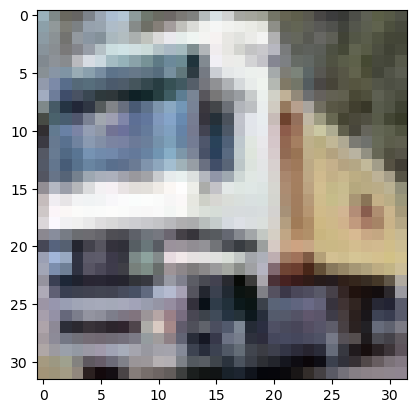

In [75]:
# Final image visualized
plt.imshow(final_image)

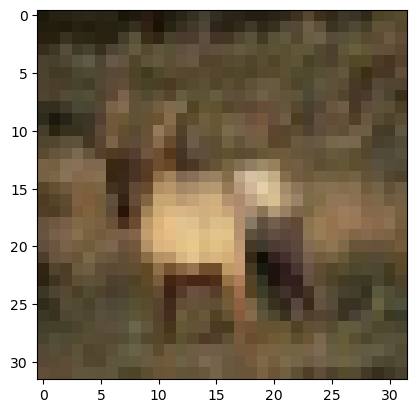

In [76]:
# Image from batch visualized
plt.imshow(batch_data[3])

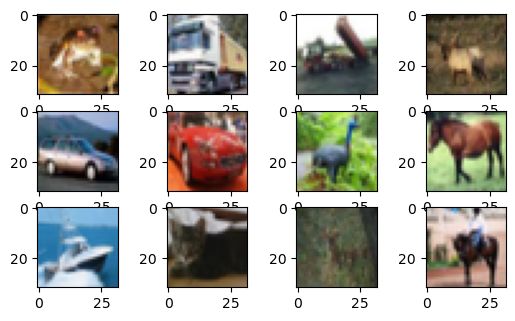

In [77]:
# Plot several images from batch 1
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(batch_data[i])

## Class distribution

All labels in batch 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


<BarContainer object of 10 artists>

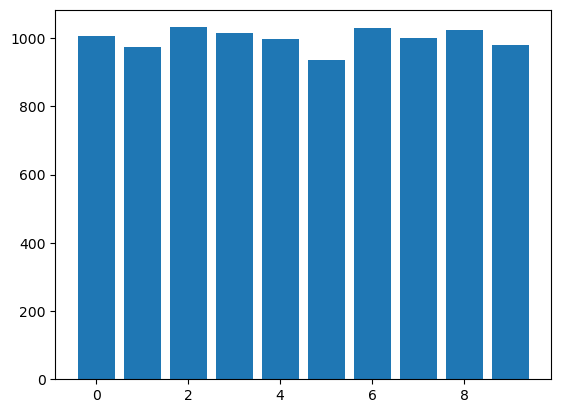

In [78]:
# Class distribution in batch 1
print("All labels in batch 1:", set(batch_1[b'labels']))

# Count how many images are in each label
counts = [batch_1[b'labels'].count(value) for value in set(batch_1[b'labels'])]

# Plot counts
plt.bar(range(len(set(batch_1[b'labels']))),counts)


All labels in batch 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


<BarContainer object of 10 artists>

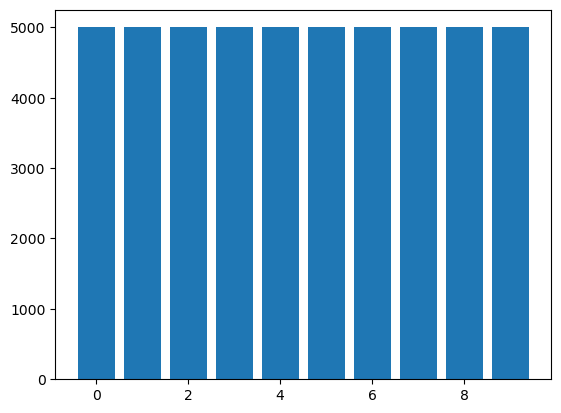

In [79]:
# Class distribution in trainset
print("All labels in trainset:", set(trainset[b'labels']))

# Count how many images are in each label
counts = [trainset[b'labels'].count(value) for value in set(trainset[b'labels'])]

# Plot counts
plt.bar(range(len(set(trainset[b'labels']))),counts)


## CIFAR-100 Datasets

#### The CIFAR-100 datasets are downloaded from: https://www.cs.toronto.edu/~kriz/cifar.html
#### And contains 5 train batches and 1 test batch

In [83]:
train = unpickle("cifar-100-python/train")

### Explore what the trainset looks like

In [84]:
# What keys does the trainset have?
print("Batch type:", type(train))
print("Amount of keys:", len(train))
print("Key names:", train.keys())

Batch type: <class 'dict'>
Amount of keys: 5
Key names: dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


### What does the data look like?

#### The data consists of 10000 numpy arrays:

In [85]:
train[b'data']

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [86]:
train[b'data'].shape

(50000, 3072)

In [87]:
train[b'data'][1]

array([255, 253, 253, ..., 253, 253, 255], dtype=uint8)

In [88]:
# Each image (datapoint) consists of an numpy array of size 3072
train[b'data'][1].shape

(3072,)

## Reshaping

#### To be able to use and visualize the images, they need to be reshaped and transposed into the standard format for images.

In [89]:
# Reshape image
example_image = train[b'data'][1]
reshaped_image = example_image.reshape(3, 32, 32)
print(reshaped_image)

[[[255 253 253 ... 253 253 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 253 253 ... 253 253 255]]

 [[255 253 253 ... 253 253 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 253 253 ... 253 253 255]]

 [[255 253 253 ... 253 253 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 253 253 ... 253 253 255]]]


In [90]:
# Transpose image
final_image = reshaped_image.transpose(1, 2, 0)
print(final_image)
print(final_image.shape)

[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]]
(32, 32, 3)


In [91]:
# Reshape and transpose all data from CIFAR-100
data = train[b'data']
data = data.reshape(len(data), 3, 32, 32).transpose(0,2,3,1)
print(data.shape)

(50000, 32, 32, 3)


## Visualize

In [92]:
import matplotlib.pyplot as plt

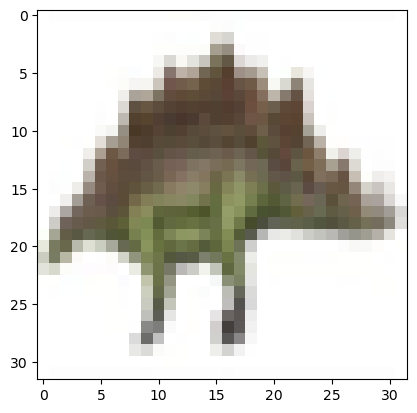

In [93]:
# Final image visualized
plt.imshow(final_image)

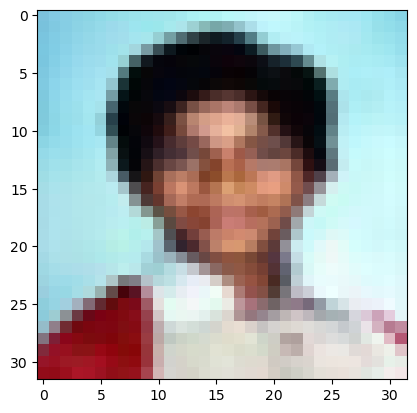

In [94]:
# Image from batch visualized
plt.imshow(data[3])

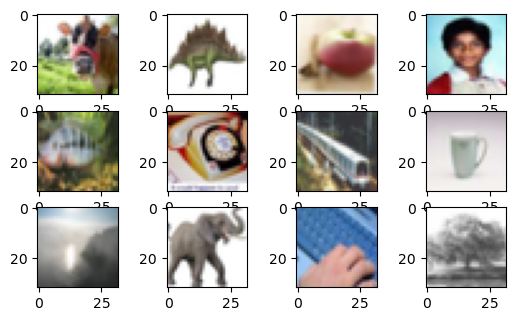

In [95]:
# Plot several images from batch 1
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(data[i])

## Class distribution

All labels in batch 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


<BarContainer object of 100 artists>

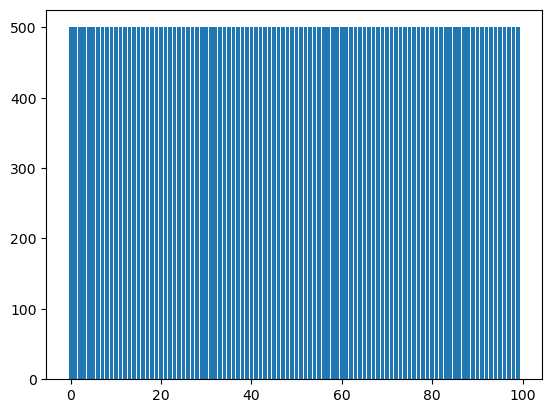

In [99]:
# Class distribution of fine labels in CIFAR-100
print("All labels in batch 1:", set(train[b'fine_labels']))

# Count how many images are in each label
counts = [train[b'fine_labels'].count(value) for value in set(train[b'fine_labels'])]

# Plot counts
plt.bar(range(len(set(train[b'fine_labels']))),counts)


All labels in batch 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


<BarContainer object of 20 artists>

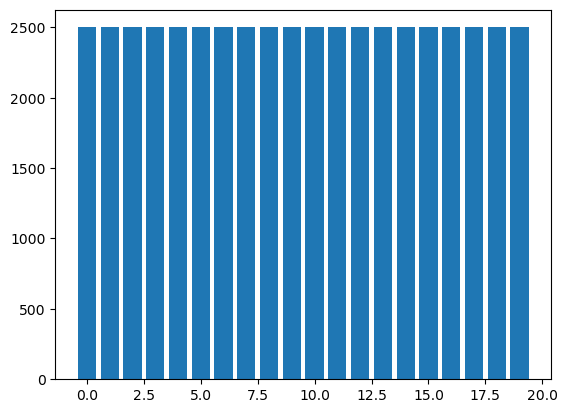

In [100]:
# Class distribution of fine labels in CIFAR-100
print("All labels in batch 1:", set(train[b'coarse_labels']))

# Count how many images are in each label
counts = [train[b'coarse_labels'].count(value) for value in set(train[b'coarse_labels'])]

# Plot counts
plt.bar(range(len(set(train[b'coarse_labels']))),counts)


### All classes of both the CIFAR-10 and CIFAR-100 datasets are equally distributed